<a href="https://colab.research.google.com/github/rikanga/Easy-Numpy/blob/main/svm_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mglearn

     |████████████████████████████████| 540 kB 15.9 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=5efb98ad7e1f7abca7e3fecdf866420483d1c87af895c8a18924b6fb0055a073
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [3]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, mglearn

In [4]:
from sklearn.svm import SVC

In [5]:
X, y = mglearn.tools.make_handcrafted_dataset()

### To create a model

In [6]:
svm = SVC(kernel='rbf', C=100, gamma=0.1).fit(X, y)

In [7]:
svm.dual_coef_

array([[-57.78072294,  -0.33101835,  -3.06148365,  -9.75013799,
          8.82907815,  17.74090372,  44.35338105]])

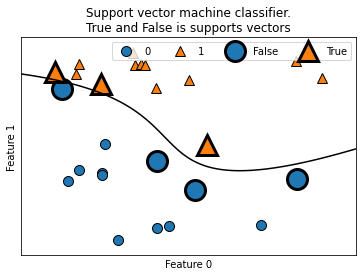

In [8]:
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

sv = svm.support_vectors_
svm_labels = svm.dual_coef_.ravel() > 0

mglearn.discrete_scatter(sv[:, 0], sv[:, 1], svm_labels, s=20, markeredgewidth=3)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Support vector machine classifier.\nTrue and False is supports vectors')
plt.legend(ncol=4, loc='best')
plt.savefig('svm.jpg')

In [9]:
svm.dual_coef_.shape

(1, 7)

### **Illustration**

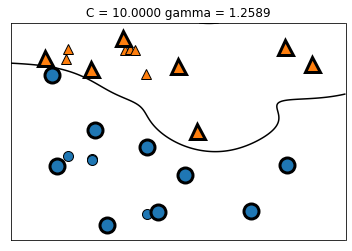

In [10]:
mglearn.plots.plot_svm(log_C=1, log_gamma=0.1)

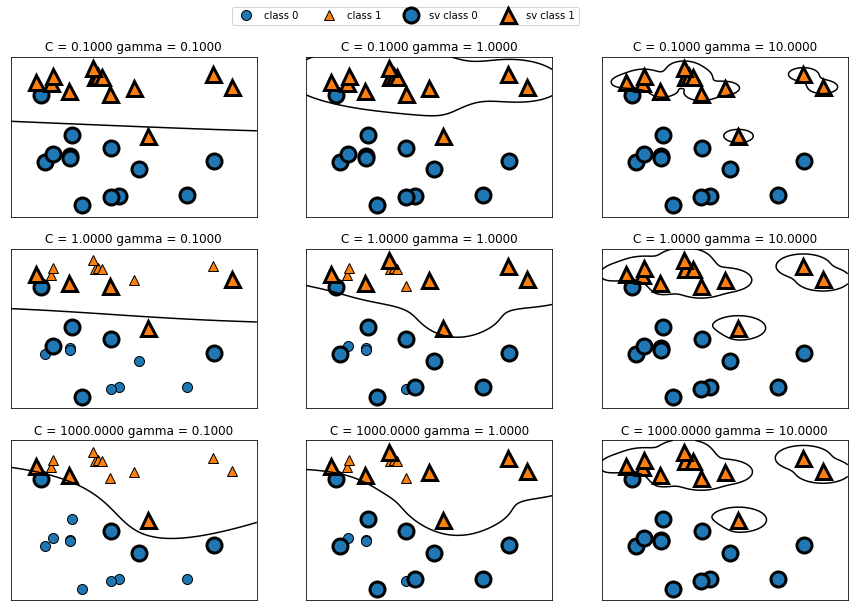

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C, in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
    
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
ncol=4, loc=(.9, 1.2))
plt.show()

### **Test with breast cancer**

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [13]:
cancer = load_breast_cancer()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target, random_state=0)

In [15]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [16]:
print("Training accuracy ", model.score(X_train, y_train))
print("Test accuracy ", model.score(X_test, y_test))

Training accuracy  0.903755868544601
Test accuracy  0.9370629370629371


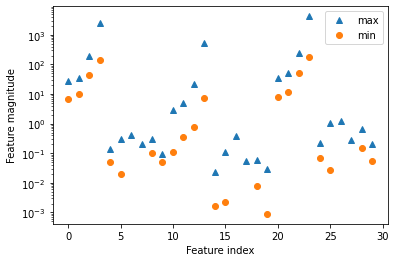

In [17]:
plt.plot(X_train.max(axis=0), '^', label="max")
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.yscale('log')
plt.xlabel('Feature index')
plt.ylabel('Feature magnitude')
plt.legend()
plt.show()